## 1. 데이터 파일 압축 해제

In [ ]:
import zipfile
zip_file = zipfile.ZipFile('/content/drive/MyDrive/4-2/4-2 통계머신러닝/과제/11 21_과제3/animal.zip')
zip_file.extractall('/content/drive/MyDrive/4-2/4-2 통계머신러닝/과제/11 21_과제3/')

---

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

import numpy as np
from PIL import Image

import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

from sklearn.preprocessing import LabelEncoder

import pandas as pd


## 2. 데이터 출력하기

In [ ]:
img_dir = '/content/drive/MyDrive/4-2/4-2 통계머신러닝/과제/11 21_과제3/animal'

folders = ['cat','dog','wild']

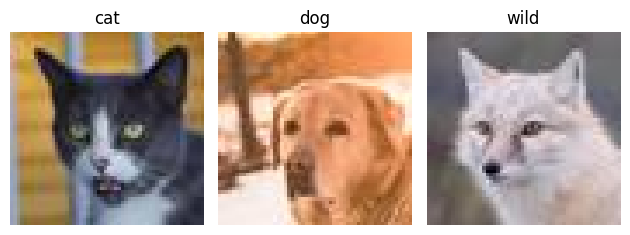

In [ ]:
fig, axes = plt.subplots(1, 3)

for idx, folder in enumerate(folders):
    if idx >= 3:
        break

    img_path = os.path.join(img_dir, folder, f"{folder}_2.jpg")
    ax = axes[idx]   # 1차원 배열

    if os.path.exists(img_path):
        img = mpimg.imread(img_path)
        ax.imshow(img)
        ax.set_title(folder)

    ax.axis('off')

plt.tight_layout()
plt.show()


## 3. 그림을 numpy arr로 변환하여 훈련에 적합한 데이터로 변경

In [ ]:
for folder in folders:
    folder_path = os.path.join(img_dir, folder)
    if not os.path.exists(folder_path):
        continue

    sizes = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".jpg"):
            file_path = os.path.join(folder_path, file_name)
            try:
                with Image.open(file_path) as img:
                    sizes.append(img.size)  # (width, height)
            except:
                pass

    if sizes:
        widths, heights = zip(*sizes)
        print(f"[{folder}]")
        print(f" - 개수: {len(sizes)}")
        print(f" - 평균 크기: {np.mean(widths):.1f} × {np.mean(heights):.1f}")
        print(f" - 최소 크기: {np.min(widths)} × {np.min(heights)}")
        print(f" - 최대 크기: {np.max(widths)} × {np.max(heights)}")
        print("-" * 50)


[cat]
 - 개수: 1000
 - 평균 크기: 56.0 × 56.0
 - 최소 크기: 56 × 56
 - 최대 크기: 56 × 56
--------------------------------------------------
[dog]
 - 개수: 1000
 - 평균 크기: 56.0 × 56.0
 - 최소 크기: 56 × 56
 - 최대 크기: 56 × 56
--------------------------------------------------
[wild]
 - 개수: 1000
 - 평균 크기: 56.0 × 56.0
 - 최소 크기: 56 × 56
 - 최대 크기: 56 × 56
--------------------------------------------------


-> 이미지의 모든 사이즈가 (56, 56)로 동일

In [ ]:
images = []
labels = []

for folder in folders:
    folder_path = os.path.join(img_dir, folder)
    if not os.path.exists(folder_path):
        continue

    # 각 폴더의 모든 PNG 파일 로드
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg"):
            file_path = os.path.join(folder_path, filename)

            # 이미지 불러오기
            # 이미지의 모든 사이즈 (28, 28)로 설정
            # img = load_img(file_path, target_size=(28, 28))
            img = load_img(file_path)
            arr = img_to_array(img)
            images.append(arr)
            labels.append(folder)

# numpy 배열로 변환
x = np.array(images) / 255.0
y = np.array(labels)

print(" x shape:", x.shape)
print(" y shape:", y.shape)


 x shape: (3000, 56, 56, 3)
 y shape: (3000,)


In [ ]:
encoder = LabelEncoder()
y_int = encoder.fit_transform(y)

In [ ]:
# 순서대로 A~Z가 구분되어 있으므로 섞어서 데이터 슬라이싱을 통해 분리하기 위함

# 전체 데이터 인덱스 생성
indices = np.arange(len(x))
np.random.seed(21)
np.random.shuffle(indices)

x = x[indices]
y_int = y_int[indices]

## 4. training/ validation/ test 데이터 분류

In [ ]:
# 전체 개수
dataset_size = len(x)
train_size = int(0.8 * dataset_size)
test_size = int(0.2 * dataset_size)
val_size = int(0.2 * test_size)

print(dataset_size, train_size, val_size, test_size)

3000 2400 120 600


In [ ]:
x_train = x[:train_size]
y_int_train = y_int[:train_size]

x_val = x[train_size:(train_size+val_size)]
y_int_val = y_int[train_size:(train_size+val_size)]

x_test = x[(train_size+val_size):]
y_int_test = y_int[(train_size+val_size):]

print(x_train.shape, y_int_train.shape)
print(x_val.shape, y_int_val.shape)
print(x_test.shape, y_int_test.shape)

(2400, 56, 56, 3) (2400,)
(120, 56, 56, 3) (120,)
(480, 56, 56, 3) (480,)


In [ ]:
vals, counts = np.unique(y_int_train, return_counts=True)
print(vals)
print(counts)

[0 1 2]
[801 797 802]


In [ ]:
vals, counts = np.unique(y_int_val, return_counts=True)
print(vals)
print(counts)

[0 1 2]
[41 42 37]


In [ ]:
vals, counts = np.unique(y_int_test, return_counts=True)
print(vals)
print(counts)

[0 1 2]
[158 161 161]


## 5. 훈련에 사용할 모형 생성

In [ ]:
model = keras.models.Sequential([
    keras.layers.Input(shape=(56,56,3)),
    keras.layers.Conv2D(filters=32,kernel_size=3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(filters=64,kernel_size=3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(filters=128,kernel_size=3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.layers

[<Conv2D name=conv2d_6, built=True>,
 <MaxPooling2D name=max_pooling2d_6, built=True>,
 <Conv2D name=conv2d_7, built=True>,
 <MaxPooling2D name=max_pooling2d_7, built=True>,
 <Conv2D name=conv2d_8, built=True>,
 <MaxPooling2D name=max_pooling2d_8, built=True>,
 <Flatten name=flatten_2, built=True>,
 <Dense name=dense_6, built=True>,
 <Dropout name=dropout_4, built=True>,
 <Dense name=dense_7, built=True>,
 <Dropout name=dropout_5, built=True>,
 <Dense name=dense_8, built=True>]

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │       627,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │           153 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 725,751 (2.77 MB)

 Trainable params: 725,751 (2.77 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer='sgd', metrics=['accuracy'])

In [ ]:
train_n = model.fit(x_train, y_int_train, epochs=60,
                    validation_data=(x_val, y_int_val))

Epoch 1/60
75/75 ━━━━━━━━━━━━━━━━━━━━ 22s 271ms/step - accuracy: 0.3235 - loss: 1.1062 - val_accuracy: 0.5083 - val_loss: 1.0888
Epoch 2/60
75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 269ms/step - accuracy: 0.3745 - loss: 1.0925 - val_accuracy: 0.4917 - val_loss: 1.0828
Epoch 3/60
75/75 ━━━━━━━━━━━━━━━━━━━━ 18s 229ms/step - accuracy: 0.3819 - loss: 1.0865 - val_accuracy: 0.6000 - val_loss: 1.0605
Epoch 4/60
75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 230ms/step - accuracy: 0.3916 - loss: 1.0769 - val_accuracy: 0.6583 - val_loss: 1.0405
Epoch 5/60
75/75 ━━━━━━━━━━━━━━━━━━━━ 21s 241ms/step - accuracy: 0.4643 - loss: 1.0582 - val_accuracy: 0.5833 - val_loss: 1.0082
Epoch 6/60
75/75 ━━━━━━━━━━━━━━━━━━━━ 19s 228ms/step - accuracy: 0.4653 - loss: 1.0300 - val_accuracy: 0.7083 - val_loss: 0.9764
Epoch 7/60
75/75 ━━━━━━━━━━━━━━━━━━━━ 17s 232ms/step - accuracy: 0.4771 - loss: 1.0273 - val_accuracy: 0.6667 - val_loss: 0.9302
Epoch 8/60
75/75 ━━━━━━━━━━━━━━━━━━━━ 21s 239ms/step - accuracy: 0.5109 - loss: 1.0013 - val_accu

## 6. 모형 정확성 평가

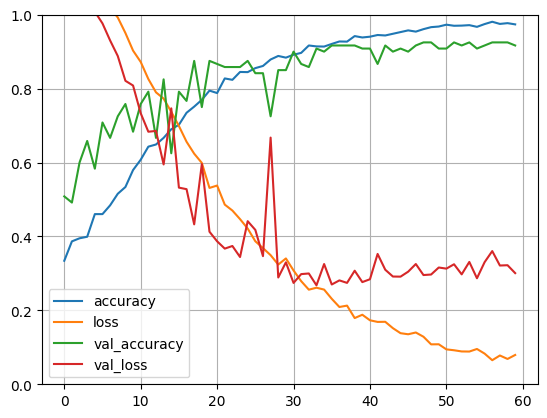

In [ ]:
pd.DataFrame(train_n.history).plot()
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
train_loss, train_acc = model.evaluate(x_train, y_int_train)
val_loss, val_acc = model.evaluate(x_val, y_int_val)
test_loss, test_acc = model.evaluate(x_test, y_int_test)

print(f"Train accuracy: {train_acc:.4f}, loss: {train_loss:.4f}")
print(f"Val accuracy:   {val_acc:.4f}, loss: {val_loss:.4f}")
print(f"Test accuracy:  {test_acc:.4f}, loss: {test_loss:.4f}")


75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - accuracy: 0.9970 - loss: 0.0152
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.9240 - loss: 0.2941
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.9199 - loss: 0.2409
Train accuracy: 0.9979, loss: 0.0138
Val accuracy:   0.9167, loss: 0.3008
Test accuracy:  0.9187, loss: 0.2795


## 7. 테스트 데이터 중 예측에 실패한 사례 살펴보기

In [ ]:
y_pred_prob = model.predict(x_test)

# axis=-1 은 axis=1과 동일
y_pred = np.argmax(y_pred_prob, axis=-1)

y_true = y_int_test

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


In [ ]:
# 잘못 예측한 정보
wrong_idx = np.where(y_pred != y_true)[0]
wrong_idx

array([ 21,  33,  35,  52,  56,  60,  69,  73,  77,  81,  82, 112, 121,
       134, 136, 170, 179, 235, 258, 277, 289, 295, 297, 325, 339, 353,
       374, 381, 382, 385, 394, 399, 411, 416, 420, 439, 446, 460, 463])

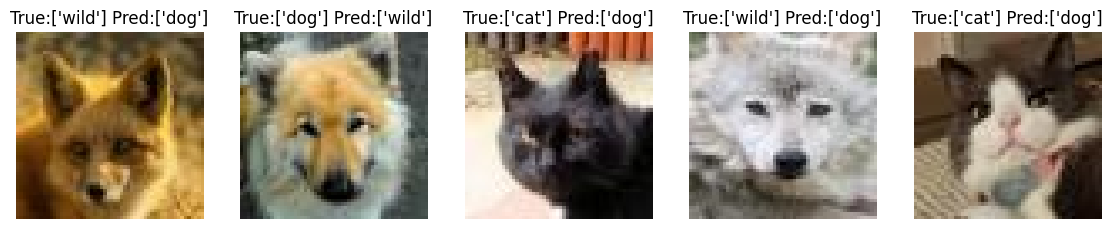

In [ ]:
# 첫 5개 틀린 사례
plt.figure(figsize=(14, 3))
for i, idx in enumerate(wrong_idx[:5]):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[idx].squeeze())

    # 기존 값 찾기
    true_label = encoder.inverse_transform([y_true[idx]])
    pred_label = encoder.inverse_transform([y_pred[idx]])
    plt.title(f"True:{true_label} Pred:{pred_label}")
    plt.axis('off')
plt.show()